In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Bank_churn_modelling.csv')
df.head(20)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0           1    15634602   Hargrave          619    France  Female   42   
1           2    15647311       Hill          608     Spain  Female   41   
2           3    15619304       Onio          502    France  Female   42   
3           4    15701354       Boni          699    France  Female   39   
4           5    15737888   Mitchell          850     Spain  Female   43   
5           6    15574012        Chu          645     Spain    Male   44   
6           7    15592531   Bartlett          822    France    Male   50   
7           8    15656148     Obinna          376   Germany  Female   29   
8           9    15792365         He          501    France    Male   44   
9          10    15592389         H?          684    France    Male   27   
10         11    15767821     Bearce          528    France    Male   31   
11         12    15737173    Andrews          497     Spain    Male   24   
12         13    15632264        Kay          476    France  Female   34   
13         14    15691483       Chin          549    France  Female   25   
14         15    15600882      Scott          635     Spain  Female   35   
15         16    15643966    Goforth          616   Germany    Male   45   
16         17    15737452      Romeo          653   Germany    Male   58   
17         18    15788218  Henderson          549     Spain  Female   24   
18         19    15661507    Muldrow          587     Spain    Male   45   
19         20    15568982        Hao          726    France  Female   24   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
1        1   83807.86              1          0               1   
2        8  159660.80              3          1               0   
3        1       0.00              2          0               0   
4        2  125510.82              1          1               1   
5        8  113755.78              2          1               0   
6        7       0.00              2          1               1   
7        4  115046.74              4          1               0   
8        4  142051.07              2          0               1   
9        2  134603.88              1          1               1   
10       6  102016.72              2          0               0   
11       3       0.00              2          1               0   
12      10       0.00              2          1               0   
13       5       0.00              2          0               0   
14       7       0.00              2          1               1   
15       3  143129.41              2          0               1   
16       1  132602.88              1          1               0   
17       9       0.00              2          1               1   
18       6       0.00              1          0               0   
19       6       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0  
15         64327.26       0  
16          5097.67       1  
17         14406.41       0  
18        158684.81       0  
19         54724.03       0

In [3]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [4]:
df.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

In [6]:
print(df.groupby('Exited')['CreditScore'].mean())

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


In [7]:
print(df.groupby('Exited')['Balance'].mean())

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


In [8]:
print(df.groupby('Exited')['IsActiveMember'].count())

Exited
0    7963
1    2037
Name: IsActiveMember, dtype: int64


In [9]:
print(df.groupby('Exited')['HasCrCard'].count())

Exited
0    7963
1    2037
Name: HasCrCard, dtype: int64


In [17]:
df1 = df.groupby('Tenure')['Exited'].sum()
df1.sort_values(ascending = False)

Tenure
1     232
3     213
9     213
5     209
4     203
2     201
8     197
6     196
7     177
10    101
0      95
Name: Exited, dtype: int64

In [14]:
df1 = df.groupby('Geography')['Exited'].sum()
df1.sort_values(ascending = False)

Geography
Germany    814
France     810
Spain      413
Name: Exited, dtype: int64

In [19]:
df1 = df.groupby('Age')['Exited'].sum()
df1.sort_values(ascending = False).head(20)

Age
46    91
40    89
43    88
45    87
48    80
42    77
47    77
49    75
44    73
39    72
50    71
41    69
51    66
52    64
38    63
37    62
35    57
36    53
54    51
56    50
Name: Exited, dtype: int64

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


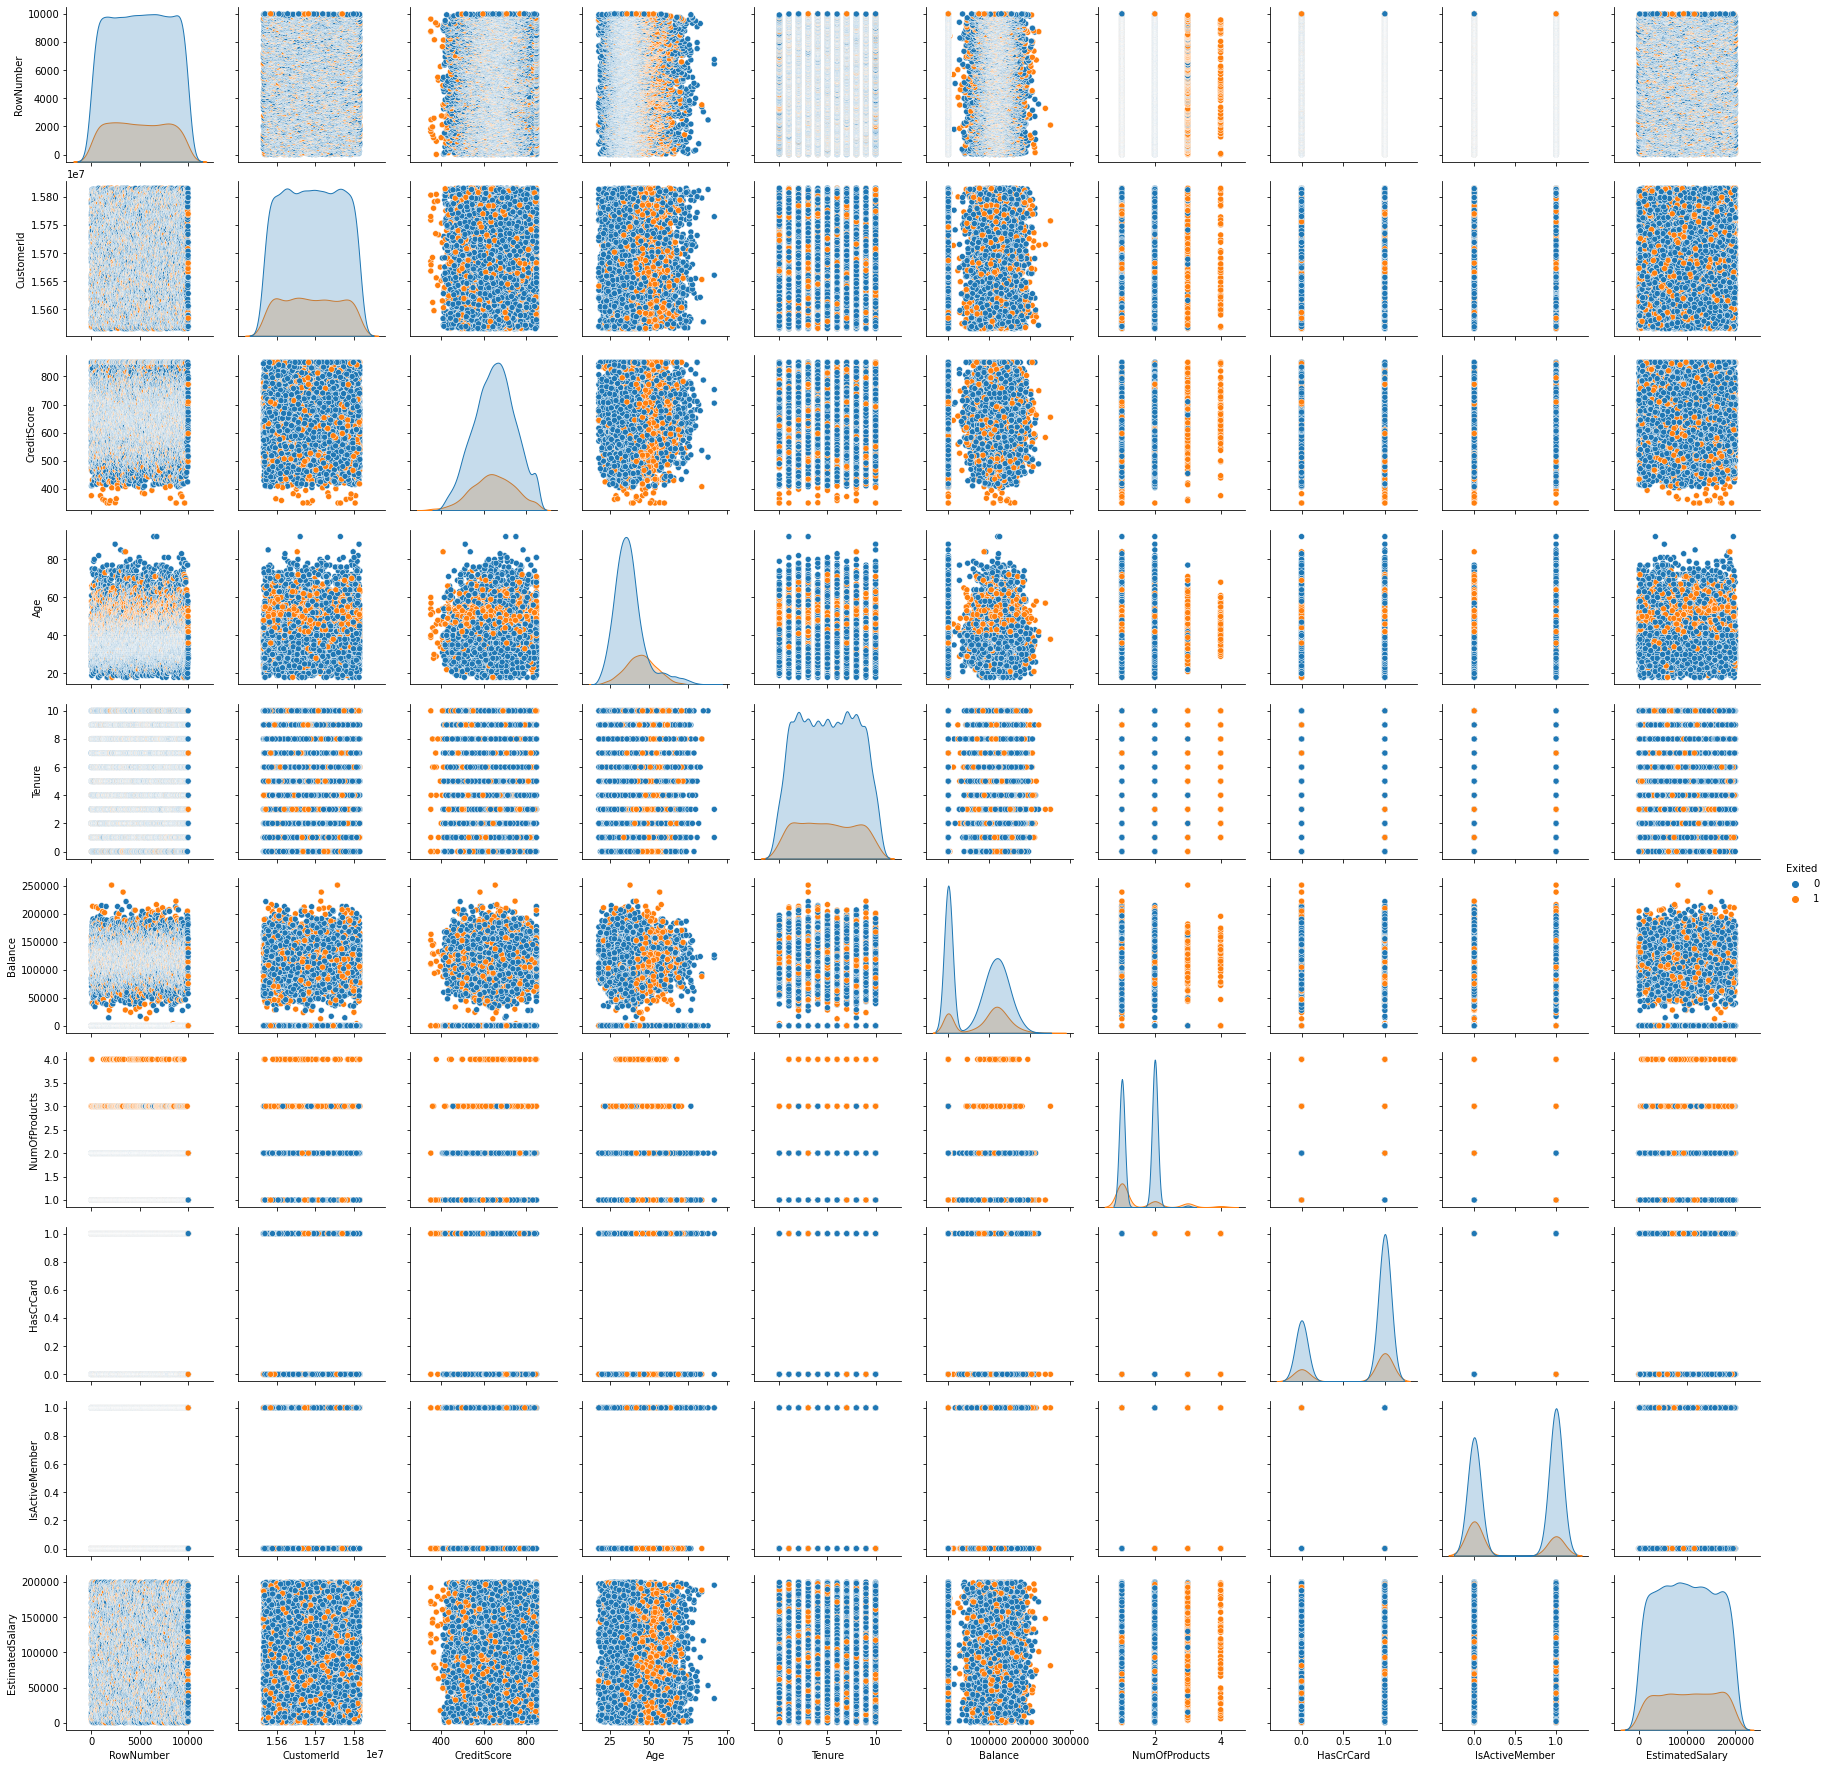

In [24]:
!pip3 install seaborn==0.12.0b3
import seaborn as sns
sns.pairplot(df, hue = 'Exited')